# Sri Lanka Weather Prediction: Linear Regression Model


## Import Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

Set visualization style

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")

## Data Loading and Initial Exploration

Load the dataset

In [ ]:
location_data = pd.read_csv('/content/sample_data/locationData.csv')
weather_data = pd.read_csv('/content/sample_data/weatherData.csv')

# Display basic information
print("Location data shape:", location_data.shape)
print("Weather data shape:", weather_data.shape)

# Display sample data
print("\nLocation Data Sample:")
print(location_data.head())
print("\nWeather Data Sample:")
print(weather_data.head())

Location data shape: (27, 8)
Weather data shape: (142371, 21)

Location Data Sample:
   location_id  latitude  longitude  elevation  utc_offset_seconds  \
0            0  6.924429   79.90725          4               19800   
1            1  7.065026   79.96622         19               19800   
2            2  6.572935   80.02519          5               19800   
3            3  7.275923   80.62659        499               19800   
4            4  7.486819   80.52632        362               19800   

       timezone  timezone_abbreviation city_name  
0  Asia/Colombo                    530   Colombo  
1  Asia/Colombo                    530   Gampaha  
2  Asia/Colombo                    530  Kalutara  
3  Asia/Colombo                    530     Kandy  
4  Asia/Colombo                    530    Matale  

Weather Data Sample:
   location_id      date  weather_code (wmo code)  temperature_2m_max (°C)  \
0            0  1/1/2010                        1                     30.1   
1         

In [ ]:
# Merge the dataframes on 'location_id'
merged_data = pd.merge(weather_data, location_data, on='location_id')

print("\nDataset information:")
merged_data.info()


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142371 entries, 0 to 142370
Data columns (total 28 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   location_id                      142371 non-null  int64  
 1   date                             142371 non-null  object 
 2   weather_code (wmo code)          142371 non-null  int64  
 3   temperature_2m_max (°C)          142371 non-null  float64
 4   temperature_2m_min (°C)          142371 non-null  float64
 5   temperature_2m_mean (°C)         142371 non-null  float64
 6   apparent_temperature_max (°C)    142371 non-null  float64
 7   apparent_temperature_min (°C)    142371 non-null  float64
 8   apparent_temperature_mean (°C)   142371 non-null  float64
 9   daylight_duration (s)            142371 non-null  float64
 10  sunshine_duration (s)            142371 non-null  float64
 11  precipitation_sum (mm)           142371 non

In [ ]:
print("\nSummary statistics:")
display(merged_data.describe())


Summary statistics:


,location_id,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),daylight_duration (s),sunshine_duration (s),...,wind_speed_10m_max (km/h),wind_gusts_10m_max (km/h),wind_direction_10m_dominant (°),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm),latitude,longitude,elevation,utc_offset_seconds,timezone_abbreviation
count,142371.000000,142371.000000,142371.000000,142371.000000,142371.000000,142371.000000,142371.000000,142371.000000,142371.000000,142371.000000,...,142371.000000,142371.000000,142371.000000,142371.000000,142371.000000,142371.000000,142371.000000,142371.000000,142371.0,142371.0
mean,13.000000,44.891586,29.295854,23.120601,25.730017,33.560477,26.362139,29.234477,43645.975220,34676.319743,...,16.461730,37.118828,177.723567,18.933608,4.115296,7.536289,80.616009,245.777778,19800.0,530.0
std,7.788908,22.840879,3.352774,3.165760,2.954064,4.183799,4.196010,3.837440,1099.470021,8910.054804,...,6.828743,11.676963,95.393165,4.398970,1.179600,1.008947,0.511603,449.345737,0.0,0.0
min,0.000000,0.000000,14.100000,5.300000,12.100000,11.000000,2.000000,9.500000,41610.710000,0.000000,...,2.300000,9.400000,0.000000,1.120000,0.380000,5.940246,79.846150,4.000000,19800.0,530.0
25%,6.000000,51.000000,27.700000,22.000000,24.700000,31.400000,25.100000,27.900000,42607.350000,32883.955000,...,11.400000,28.100000,78.000000,16.570000,3.350000,6.854130,80.233730,8.000000,19800.0,530.0
50%,13.000000,53.000000,29.300000,23.800000,26.200000,33.900000,27.600000,30.100000,43648.880000,38819.230000,...,15.600000,35.300000,209.000000,19.710000,4.110000,7.275923,80.534480,38.000000,19800.0,530.0
75%,20.000000,61.000000,31.300000,25.200000,27.600000,36.300000,29.100000,31.600000,44685.075000,39898.010000,...,20.400000,44.300000,247.000000,22.090000,4.890000,8.330404,81.015360,172.000000,19800.0,530.0
max,26.000000,65.000000,40.300000,30.300000,32.700000,46.100000,35.600000,37.700000,45676.100000,42231.340000,...,60.700000,123.500000,360.000000,29.400000,8.450000,9.666080,81.693474,1865.000000,19800.0,530.0


### Check for missing values

In [ ]:
missing_values = merged_data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "No missing values found")


Missing values in each column:
No missing values found


## Data Preprocessing and Cleaning

In [ ]:
# Convert date column to datetime format
merged_data['date'] = pd.to_datetime(merged_data['date'])

In [ ]:
# Extract useful date features
merged_data['month'] = merged_data['date'].dt.month
merged_data['day_of_year'] = merged_data['date'].dt.dayofyear
merged_data['season'] = pd.cut(merged_data['month'],
                       bins=[0, 3, 6, 9, 12],
                       labels=['Winter', 'Spring', 'Summer', 'Fall'],
                       include_lowest=True)

In [ ]:
# Convert sunrise and sunset to time features (hours since midnight)
def time_to_hours(time_str):
    try:
        time_obj = datetime.strptime(time_str, '%H:%M').time()
        return time_obj.hour + time_obj.minute/60
    except:
        return np.nan

merged_data['sunrise_hour'] = merged_data['sunrise'].apply(time_to_hours)
merged_data['sunset_hour'] = merged_data['sunset'].apply(time_to_hours)
merged_data['daylight_hours'] = merged_data['daylight_duration (s)'] / 3600  # Convert seconds to hours

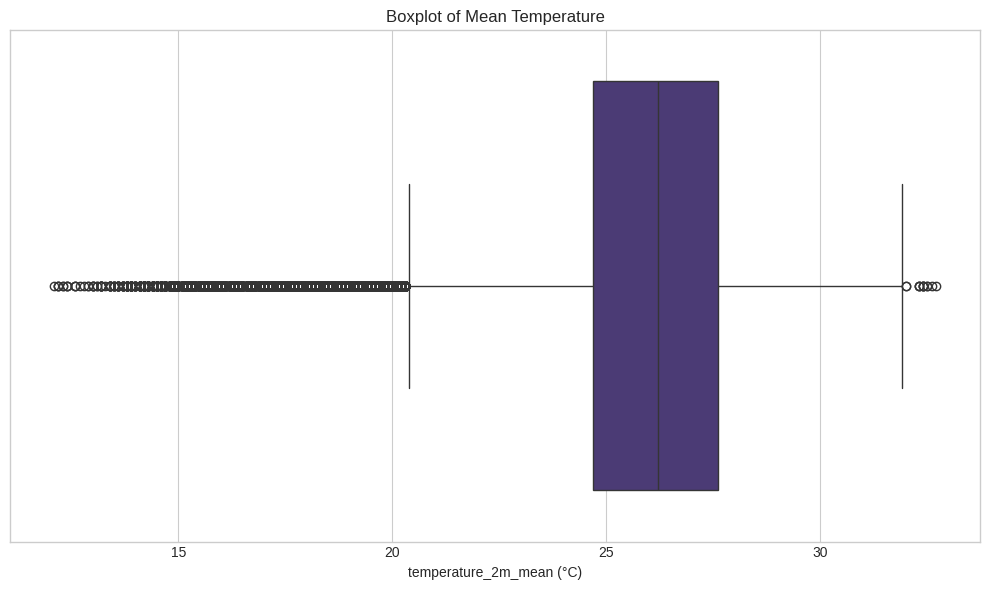

In [ ]:
# Check for outliers in target variable
plt.figure(figsize=(10, 6))
sns.boxplot(x=merged_data['temperature_2m_mean (°C)'])
plt.title('Boxplot of Mean Temperature')
plt.tight_layout()
plt.show()

In [ ]:
# Function to handle outliers using IQR method
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = ((df[column] < lower_bound) | (df[column] > upper_bound))
    print(f"Number of outliers in {column}: {outliers.sum()}")

    # Replace outliers with bounds
    df.loc[df[column] > upper_bound, column] = upper_bound
    df.loc[df[column] < lower_bound, column] = lower_bound

    return df

In [ ]:
# Handle outliers in key numeric columns
for col in ['temperature_2m_mean (°C)', 'precipitation_sum (mm)', 'wind_speed_10m_max (km/h)']:
    merged_data = handle_outliers(merged_data, col)

Number of outliers in temperature_2m_mean (°C): 9499
Number of outliers in precipitation_sum (mm): 12986
Number of outliers in wind_speed_10m_max (km/h): 2181


## Exploratory Data Analysis

In [ ]:
# Correlation matrix for numeric features
numeric_cols = merged_data.select_dtypes(include=['float64', 'int64']).columns
correlation = merged_data[numeric_cols].corr()

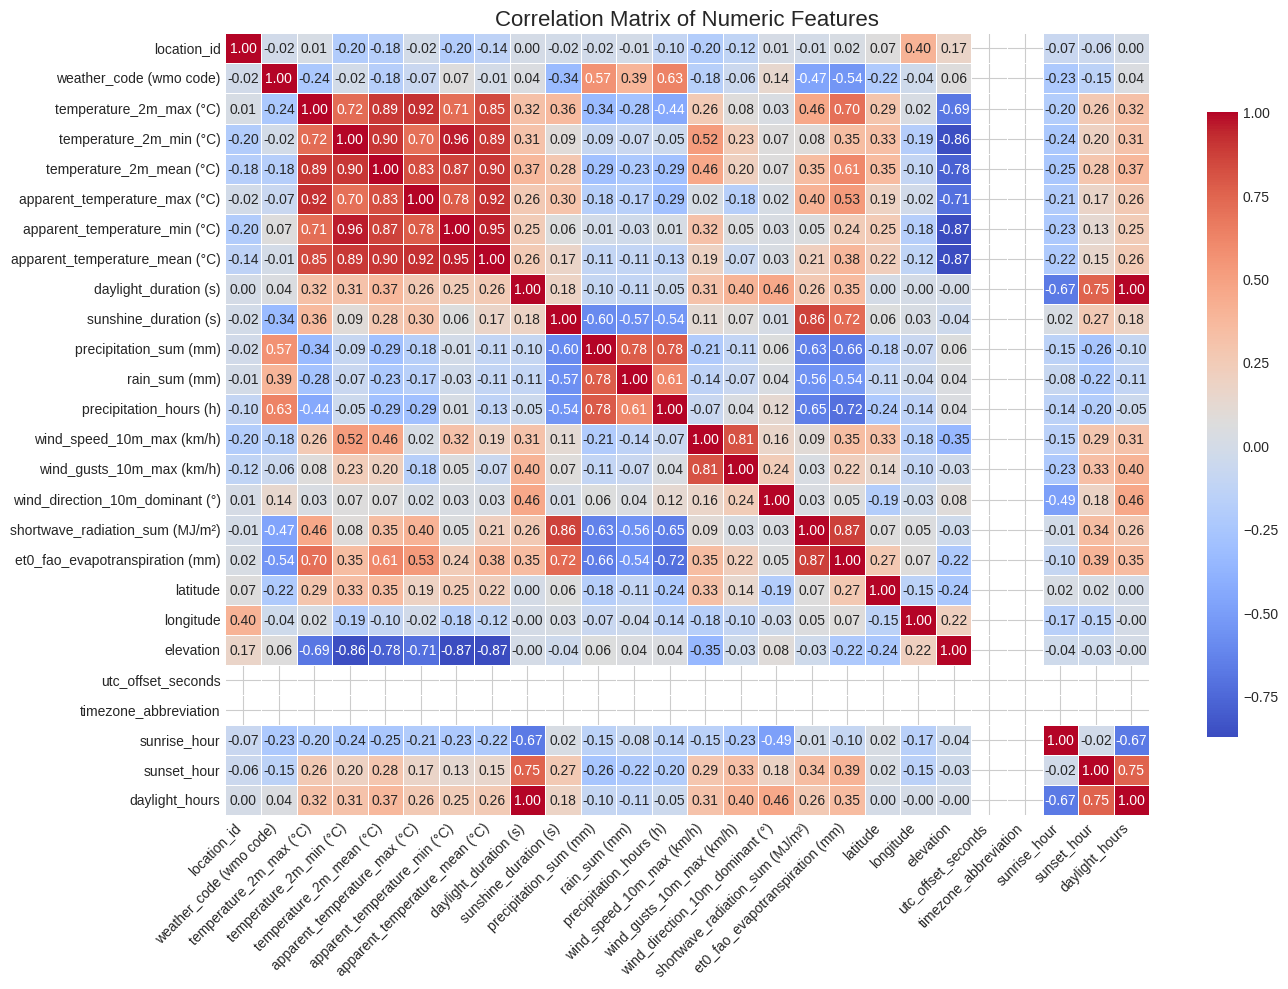

In [ ]:
plt.figure(figsize=(14, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numeric Features', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

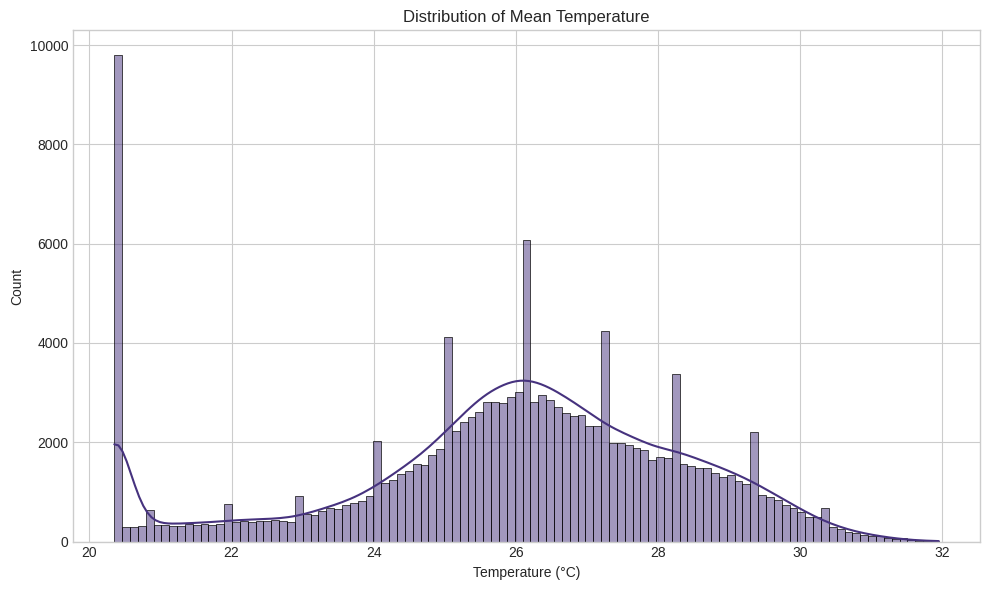

In [ ]:
# Distribution of target variable
plt.figure(figsize=(10, 6))
sns.histplot(data=merged_data, x='temperature_2m_mean (°C)', kde=True)
plt.title('Distribution of Mean Temperature')
plt.xlabel('Temperature (°C)')
plt.tight_layout()
plt.show()

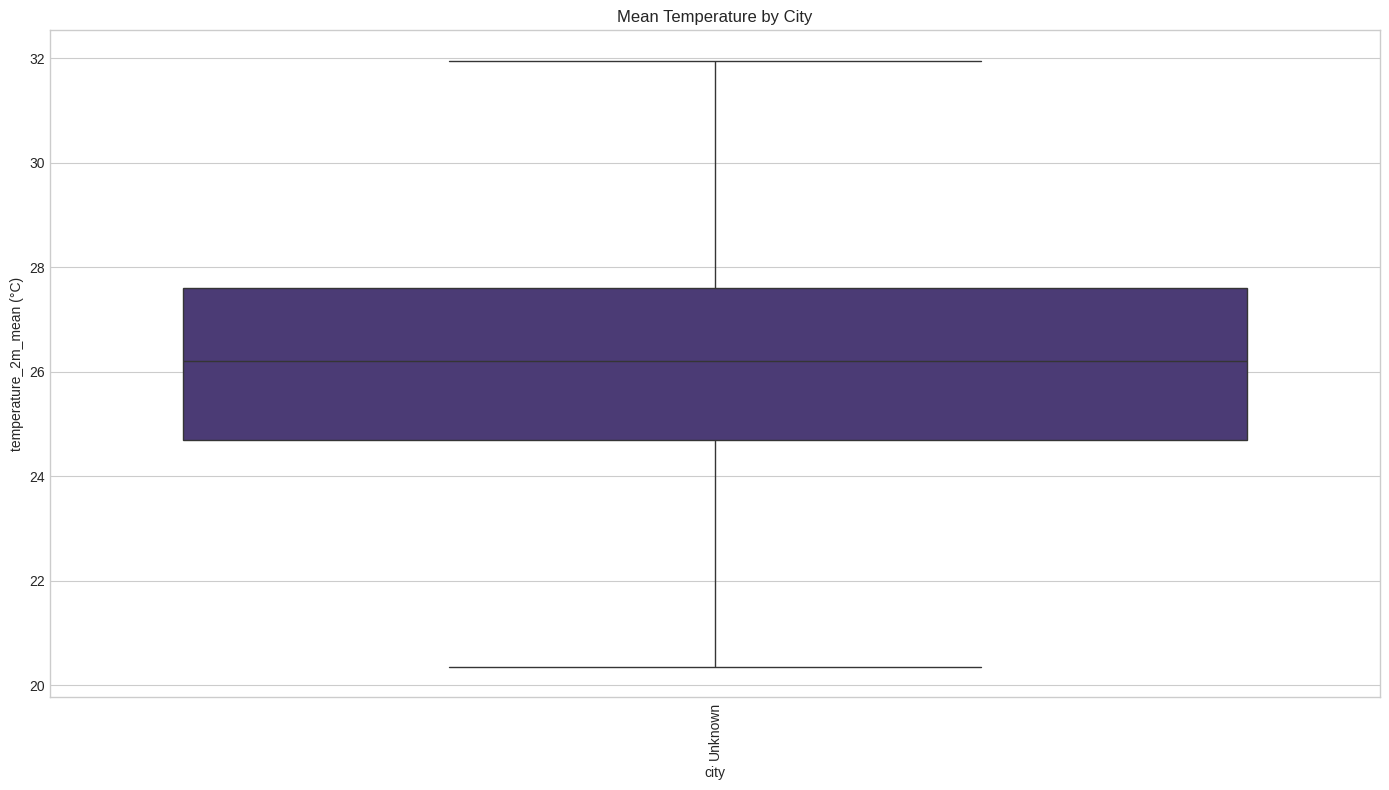

In [ ]:
# Temperature variation by city
plt.figure(figsize=(14, 8))
city_cols = [col for col in merged_data.columns if col.startswith('city_name_')]
city_data = merged_data.copy()
city_data['city'] = 'Unknown'

for col in city_cols:
    city_name = col.replace('city_name_', '')
    city_data.loc[merged_data[col] == True, 'city'] = city_name

sns.boxplot(data=city_data, x='city', y='temperature_2m_mean (°C)')
plt.title('Mean Temperature by City')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

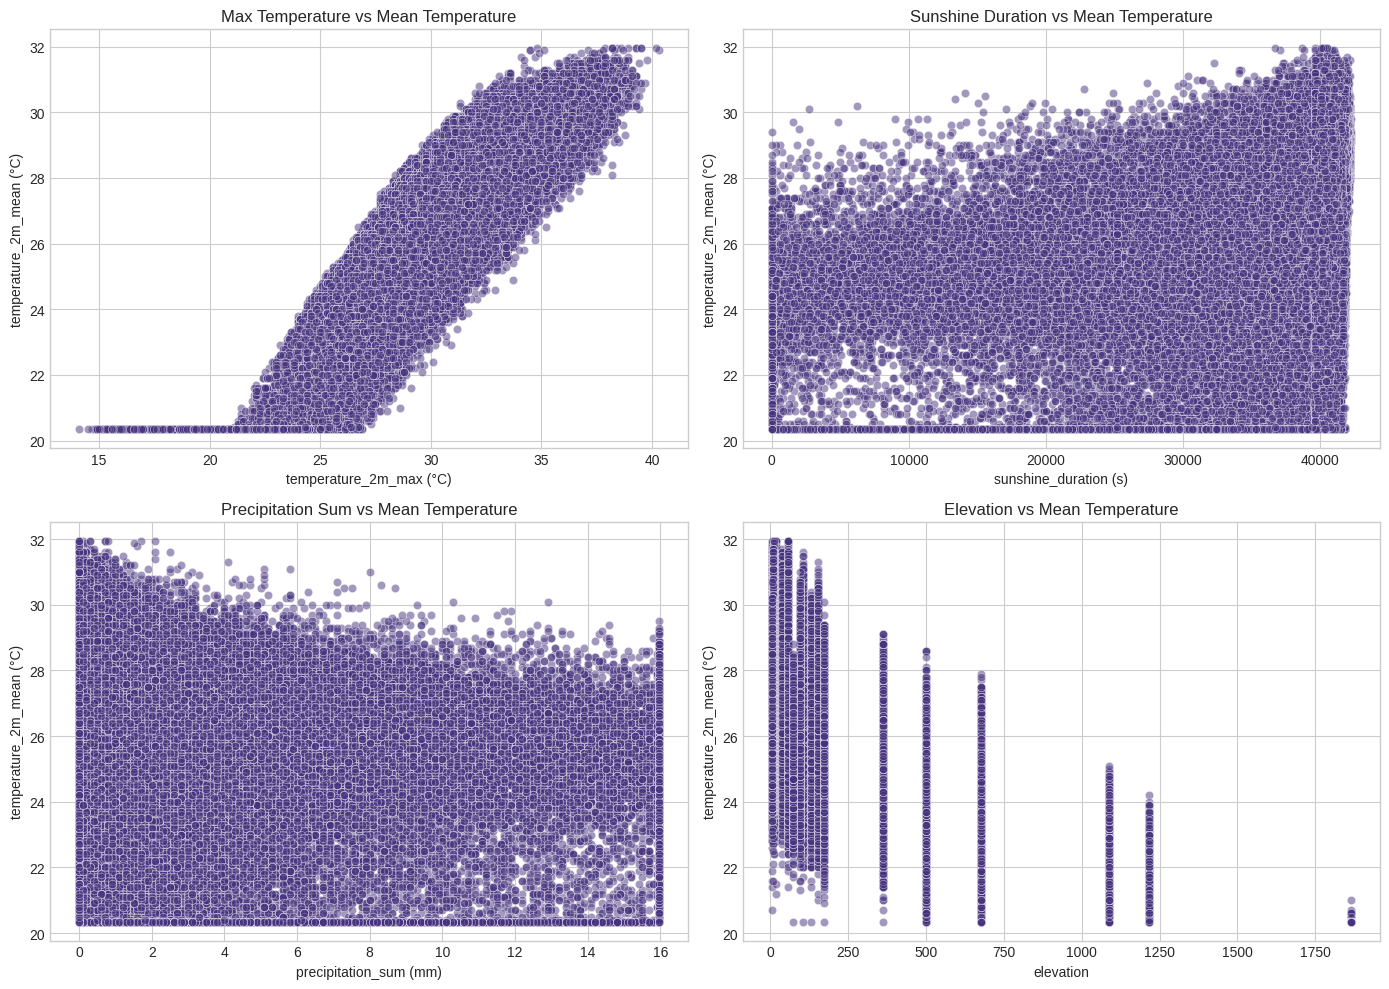

In [ ]:
# Scatter plot of key features vs target
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

sns.scatterplot(data=merged_data, x='temperature_2m_max (°C)', y='temperature_2m_mean (°C)', ax=axes[0], alpha=0.5)
axes[0].set_title('Max Temperature vs Mean Temperature')

sns.scatterplot(data=merged_data, x='sunshine_duration (s)', y='temperature_2m_mean (°C)', ax=axes[1], alpha=0.5)
axes[1].set_title('Sunshine Duration vs Mean Temperature')

sns.scatterplot(data=merged_data, x='precipitation_sum (mm)', y='temperature_2m_mean (°C)', ax=axes[2], alpha=0.5)
axes[2].set_title('Precipitation Sum vs Mean Temperature')

sns.scatterplot(data=merged_data, x='elevation', y='temperature_2m_mean (°C)', ax=axes[3], alpha=0.5)
axes[3].set_title('Elevation vs Mean Temperature')

plt.tight_layout()
plt.show()

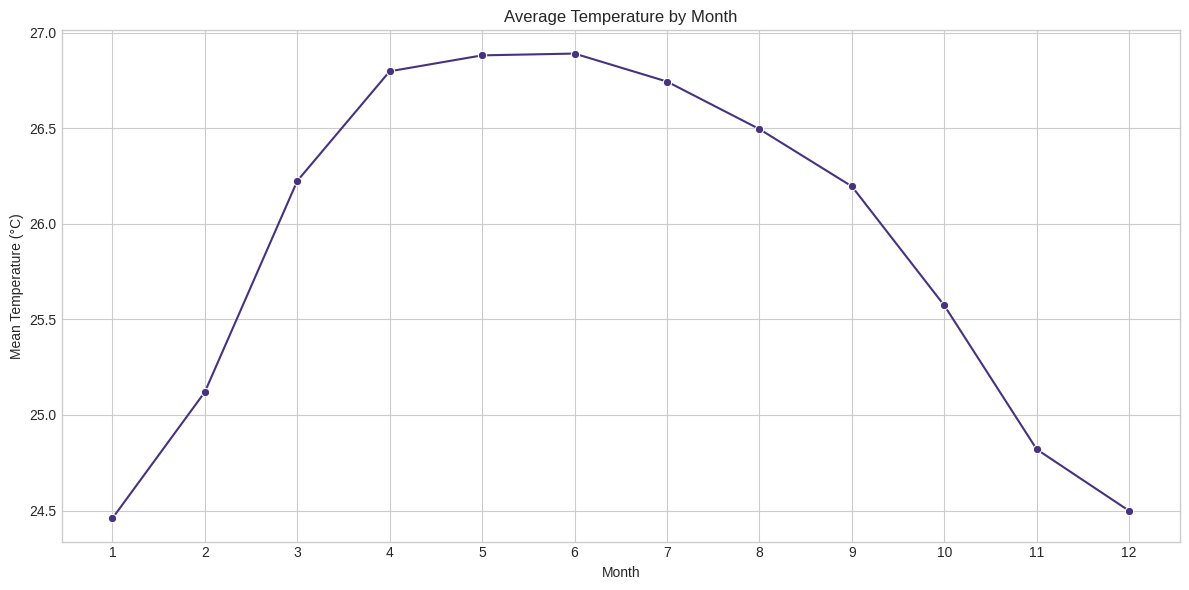

In [ ]:
# Temperature variation by month
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_data, x='month', y='temperature_2m_mean (°C)', ci=None, marker='o')
plt.title('Average Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Mean Temperature (°C)')
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

## Feature Engineering and Selection

In [ ]:
# Create new features
merged_data['diurnal_range'] = merged_data['temperature_2m_max (°C)'] - merged_data['temperature_2m_min (°C)']
merged_data['sunshine_ratio'] = merged_data['sunshine_duration (s)'] / merged_data['daylight_duration (s)']
merged_data['radiation_per_daylight'] = merged_data['shortwave_radiation_sum (MJ/m²)'] / merged_data['daylight_hours']

In [ ]:
# Feature selection based on correlation with target
target_corr = correlation['temperature_2m_mean (°C)'].abs().sort_values(ascending=False)
print("\nFeatures correlation with Mean Temperature:")
display(target_corr)


Features correlation with Mean Temperature:


,temperature_2m_mean (°C)
temperature_2m_mean (°C),1.000000
temperature_2m_min (°C),0.903178
apparent_temperature_mean (°C),0.902688
temperature_2m_max (°C),0.891569
apparent_temperature_min (°C),0.865233
apparent_temperature_max (°C),0.828224
elevation,0.783131
et0_fao_evapotranspiration (mm),0.609637
wind_speed_10m_max (km/h),0.464247
daylight_hours,0.370934


Select features for model

In [ ]:
# Exclude target variable and highly correlated features with target
selected_features = [
    'temperature_2m_max (°C)',
    'temperature_2m_min (°C)',
    'apparent_temperature_max (°C)',
    'apparent_temperature_min (°C)',
    'daylight_hours',
    'sunshine_duration (s)',
    'precipitation_sum (mm)',
    'rain_sum (mm)',
    'wind_speed_10m_max (km/h)',
    'elevation',
    'shortwave_radiation_sum (MJ/m²)',
    'et0_fao_evapotranspiration (mm)',
    'latitude',
    'longitude',
    'month',
    'day_of_year'
]

In [ ]:
# Include city one-hot encoded columns
city_cols = [col for col in merged_data.columns if col.startswith('city_name_')]
selected_features.extend(city_cols)

In [ ]:
# Prepare data for modeling
X = merged_data[selected_features]
y = merged_data['temperature_2m_mean (°C)']

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (113896, 16)
Testing set shape: (28475, 16)


## Model Building

In [ ]:
# Linear Regression Model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

## Model Evaluation

In [ ]:
# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


Model Evaluation Metrics:
Mean Absolute Error (MAE): 0.3719
Mean Squared Error (MSE): 0.3060
Root Mean Squared Error (RMSE): 0.5531
R² Score: 0.9511


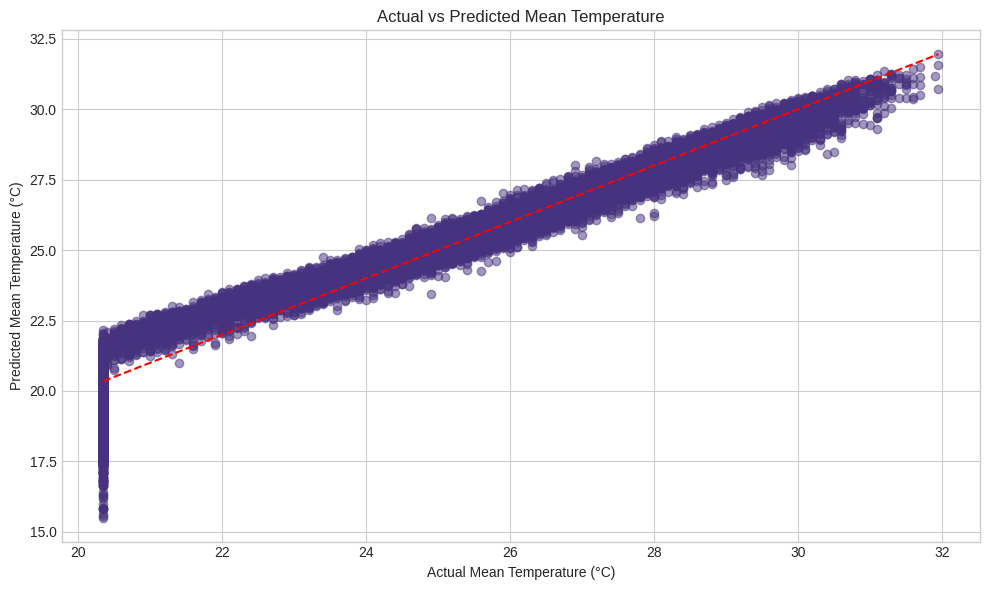

In [ ]:
# Visualize actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Mean Temperature (°C)')
plt.ylabel('Predicted Mean Temperature (°C)')
plt.title('Actual vs Predicted Mean Temperature')
plt.tight_layout()
plt.show()

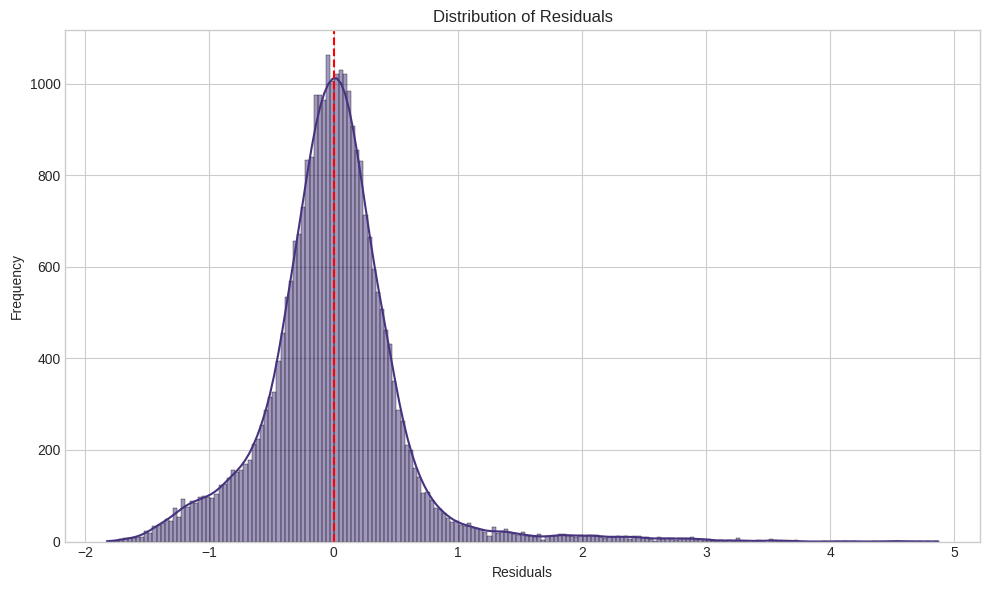

In [ ]:
# Plot residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.axvline(x=0, color='r', linestyle='--')
plt.tight_layout()
plt.show()

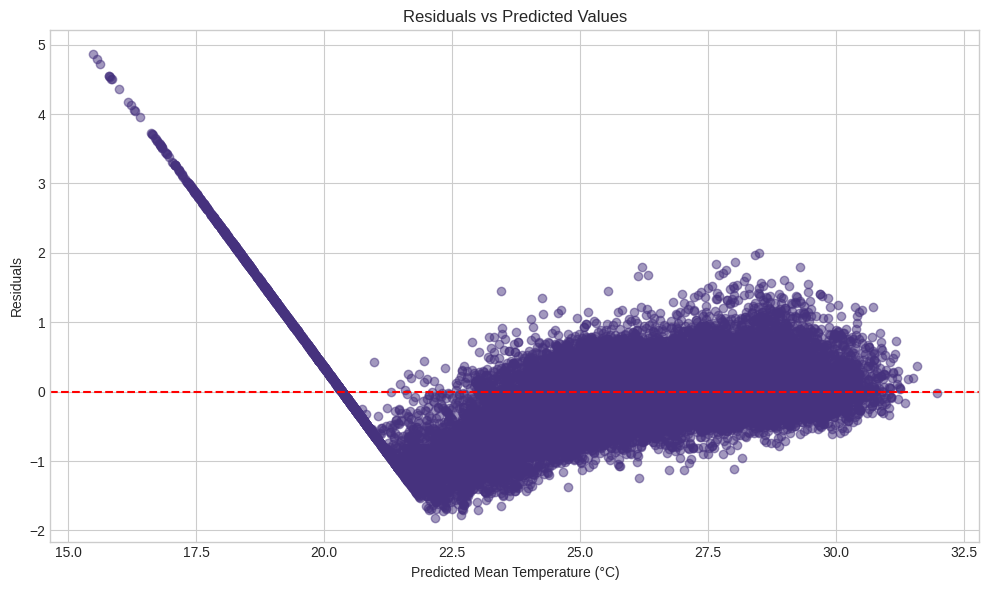

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Mean Temperature (°C)')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.tight_layout()
plt.show()

## Feature Importance

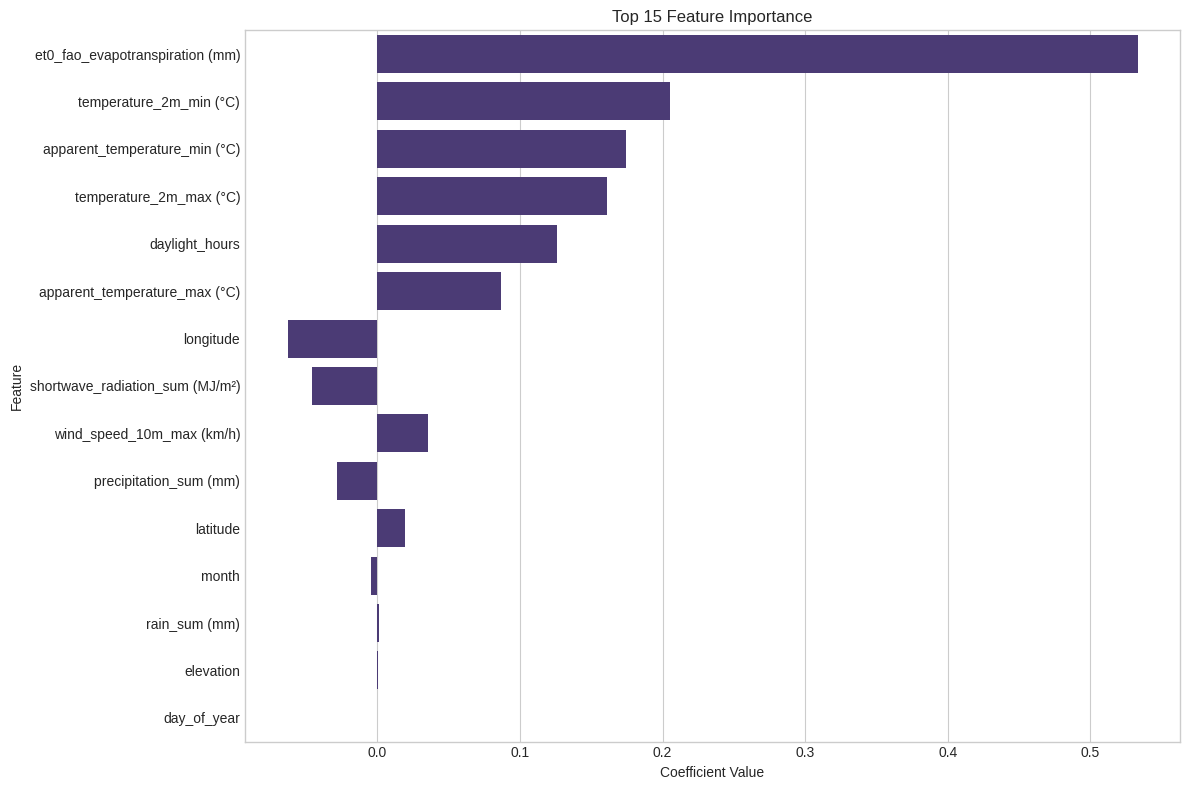

In [ ]:
# Get feature importance
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr_model.coef_
})

coefficients = coefficients.sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=coefficients.head(15), x='Coefficient', y='Feature')
plt.title('Top 15 Feature Importance')
plt.xlabel('Coefficient Value')
plt.tight_layout()
plt.show()

## Conclusion

In [ ]:
print(f"The Linear Regression model achieved an R² score of {r2:.4f}, explaining approximately {r2*100:.1f}% of the variance in mean temperature.")
print(f"The model has a Root Mean Squared Error (RMSE) of {rmse:.4f}°C, indicating the average prediction error.")
print(f"Based on the feature importance analysis, the most influential predictors for mean temperature are: {', '.join(coefficients['Feature'].head(5).tolist())}")
print("This model provides a solid baseline for temperature prediction in Sri Lanka and could be further improved with the strategies mentioned above.")

The Linear Regression model achieved an R² score of 0.9511, explaining approximately 95.1% of the variance in mean temperature.
The model has a Root Mean Squared Error (RMSE) of 0.5531°C, indicating the average prediction error.
Based on the feature importance analysis, the most influential predictors for mean temperature are: et0_fao_evapotranspiration (mm), temperature_2m_min (°C), apparent_temperature_min (°C), temperature_2m_max (°C), daylight_hours
This model provides a solid baseline for temperature prediction in Sri Lanka and could be further improved with the strategies mentioned above.
